In [1]:
import gensim
import nltk
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

In [2]:
text = '''India has been a federal republic since 1950, governed through a democratic 
parliamentary system, and has been the world's most populous democracy since the time of its 
independence in 1947.[56][57][58] It is a pluralistic, multilingual and multi-ethnic society. 
India's nominal per capita income increased from US$64 annually in 1951 to US$2,601 in 2022, and 
its literacy rate from 16.6% to 74%. During the same time, its population grew from 361 million to almost
1.4 billion,[59] and India became the most populous country in 2023.[60][61] From being a comparatively 
destitute country in 1951,[62] India has become a fast-growing major economy and a hub for information 
'''

words = word_tokenize(text)
words
sentences = [words]
model = Word2Vec(sentences, vector_size=32, window=2, min_count=1, sg=1)

word = "India"
if word in model.wv:
    word_vector = model.wv[word]
    print(f"Word Vector for {word} is {word_vector}")
else:
    print(f"{word} not found in vocabualry")

Word Vector for India is [-5.8724373e-03 -1.3631160e-02 -1.9941533e-02 -1.1645327e-02
  1.3365097e-02 -1.1697446e-02  2.6408739e-02  4.8696767e-03
 -2.2628281e-02  2.9634045e-02  2.3989249e-02  1.7023647e-02
 -2.1185607e-02  1.8101443e-02  1.2552373e-02  1.6410684e-02
  1.3447672e-02  6.1391005e-03 -1.0030487e-02  2.6194850e-02
  3.0129664e-02  1.2117074e-02 -8.5992012e-03  6.7136018e-05
  3.7384972e-03 -2.6346741e-02 -2.5790915e-02 -7.8295160e-04
  4.0109763e-03 -1.8139778e-02 -1.4829682e-02 -2.2973809e-02]


In [3]:
sentences[0][3]

'a'

In [4]:
# import pandas as pd
# from tensorflow.keras.datasets import imdb
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# max_features = 10000
# (x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=max_features)

# word_index = imdb.get_word_index()

# reverse_word_index = {value: key for (key,value) in word_index.items()}

# def decode_review(encoded_review):
#     return " ".join([reverse_word_index.get(i-3, '?') for i in encoded_review ])


# decode_review = [decode_review(review) for review in x_train[:5]]

# df = pd.DataFrame({
#     "Review" : decode_review,
#     "Sentiment" : ["Positive" if label==1 else "Negative" for label in y_train[:5]]
# })

# df.head(5)

In [ ]:
#import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [17]:
#load the imdb dataset   - you decide 
max_features = 10000 #vocabulary size
max_len = 100 #maximum revier length (after padding)

In [18]:
# (a, b), _ = imdb.load_data(num_words=max_features)
# x_train, x_test, y_train, y_test = train_test_split(a, b, test_size=0.20, random_state=10)
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=max_features)

In [19]:
#Padding
x_train = pad_sequences(x_train, maxlen=max_len)
x_test =  pad_sequences(x_test, maxlen=max_len)

In [20]:
#RNN
model_rnn = models.Sequential()

#embedding layer
model_rnn.add(layers.Embedding(max_features,32))

#simple RNN
model_rnn.add(layers.SimpleRNN(32))

model_rnn.add(layers.Dense(1, activation='sigmoid'))    #output

In [21]:
model_rnn.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history_rnn = model_rnn.fit(x_train,y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6183 - loss: 0.6238 - val_accuracy: 0.8178 - val_loss: 0.4135
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8639 - loss: 0.3275 - val_accuracy: 0.8326 - val_loss: 0.4040
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9187 - loss: 0.2190 - val_accuracy: 0.8152 - val_loss: 0.4295
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9634 - loss: 0.1143 - val_accuracy: 0.8102 - val_loss: 0.4959
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9854 - loss: 0.0555 - val_accuracy: 0.8056 - val_loss: 0.5790


In [23]:

# plt.figure(figsize=(6,4))
# plt.plot(history_rnn.history['accuracy'], label='Ttraining Accuracy (RNN)')
# plt.plot(history_rnn.history['val_accuracy'], label='Val Accuracy (RNN)')
# plt.title("Simple RNN Model")
# plt.legend()
# plt.grid(True)

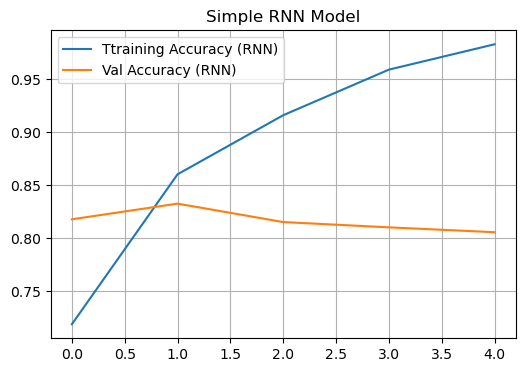

In [24]:
plt.figure(figsize=(6,4))
plt.plot(history_rnn.history['accuracy'], label='Ttraining Accuracy (RNN)')
plt.plot(history_rnn.history['val_accuracy'], label='Val Accuracy (RNN)')
plt.title("Simple RNN Model")
plt.legend()
plt.grid(True)

In [25]:
# hyper param

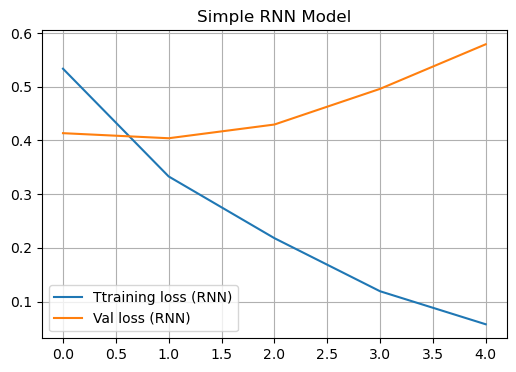

In [26]:
plt.figure(figsize=(6,4))
plt.plot(history_rnn.history['loss'], label='Ttraining loss (RNN)')
plt.plot(history_rnn.history['val_loss'], label='Val loss (RNN)')
plt.title("Simple RNN Model")
plt.legend()
plt.grid(True)

In [30]:

prediction_rnn = model_rnn.predict(x_test[:5])

for i , prediction in enumerate(prediction_rnn):
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    print(f"Review {i+1} (RNN) : Predicted Sentiment = {sentiment}, Actual Sentiment = {'positive' if y_test[i] == 1 else 'Negative'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Review 1 (RNN) : Predicted Sentiment = Negative, Actual Sentiment = Negative
Review 2 (RNN) : Predicted Sentiment = Positive, Actual Sentiment = positive
Review 3 (RNN) : Predicted Sentiment = Positive, Actual Sentiment = positive
Review 4 (RNN) : Predicted Sentiment = Negative, Actual Sentiment = Negative
Review 5 (RNN) : Predicted Sentiment = Positive, Actual Sentiment = positive


In [ ]:
"I do not like this move this is the worst thing i have ever seen in my entire life"

# max-len (100) -> emb -> model_rnn.predict()

# text - word_indexs =- mox + mpdel -rnn 

